In [12]:
%load_ext autoreload
%autoreload 2

In [23]:
from src.llamma import LLAMMA
import matplotlib.pyplot as plt

In [24]:
class Oracle():
    def __init__(self):
        pass
    def price(self):
        return 1490

llamma = LLAMMA(100, 1500, Oracle(), 0)

In [25]:
n0 = llamma.active_band
llamma.deposit('Bob', 1000, n0+1, n0 + 8)
llamma.deposit('Alice', 767, n0+1, n0 + 3)

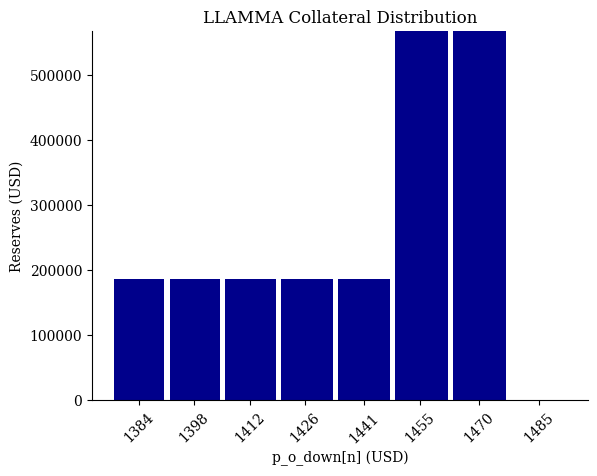

In [ ]:
llamma.plot_reserves()

In [ ]:
out_x, out_y = llamma.withdraw('Bob', 0.7)

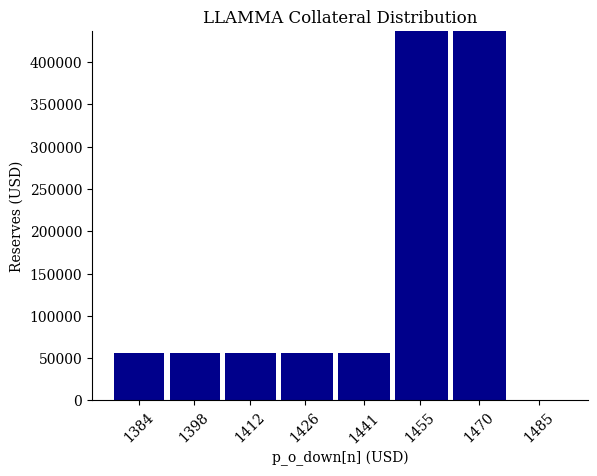

In [ ]:
llamma.plot_reserves()

In [ ]:
s = llamma._swap(500000, y_in=False)
s

Swap(
in_amount=500000
 out_amount=329.57538205290007
reserves=defaultdict(<function Swap.__init__.<locals>.<lambda> at 0x121223600>, {0: [0.0, 0.0], 1: [444206.8919343874, 0], 2: [55793.108065612614, 256.7579512804332]})
admin_fee=0.0
n1=0
n2=2)

In [ ]:
llamma.swap(500000, y_in=False)

(500000, 329.57538205290007)

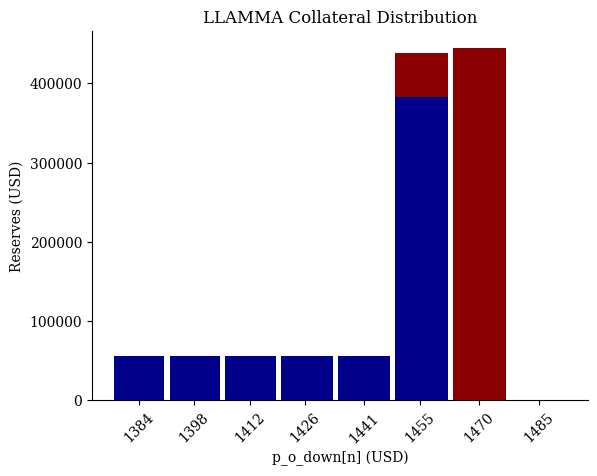

In [ ]:
llamma.plot_reserves()

In [21]:
import pandas
import plotly.express as px

def calc_p_impact(x,y,original_swap_x,fee):
    if original_swap_x == 0: return 0
    k = x*y
    original_price = x/y
    swap_x = original_swap_x*(1-fee)
    new_x = x + swap_x
    new_y = k/new_x
    swap_y = y-new_y
    trade_price = swap_x/swap_y
    new_price = new_x/new_y

    return((trade_price-original_price)/original_price)


slippage = []
for i in range(1,100000):
    slippage+=[calc_p_impact(x=2e6,y=1e3,original_swap_x=i*100,fee=0)]

fig = px.line(x=[i*100 for i in range(1,100000)],y=slippage)
fig.show()

In [27]:
import plotly.express as px

import pandas as pd
import numpy as np
from itertools import product

# Create three numpy arrays
array1 = np.array(range(-5,5))
array2 = np.array(range(90,300,10))

# Generate all possible combinations of the three arrays
combinations = list(product(array1, array2, array3))

# Create a DataFrame from the combinations
df = pd.DataFrame(combinations, columns=['Band', 'LTV', 'Size'])

# Print the resulting DataFrame
print(df)

fig = px.scatter_3d(df, x='Tick', y='LTV', z='Band',color='Size')
fig.show()

    Array1  Array2  Array3  Array4
0        1       4       7      10
1        1       4       7      11
2        1       4       7      12
3        1       4       8      10
4        1       4       8      11
..     ...     ...     ...     ...
76       3       6       8      11
77       3       6       8      12
78       3       6       9      10
79       3       6       9      11
80       3       6       9      12

[81 rows x 4 columns]
